# AIN 214 - LAB 5 - DATA PREPARATION

The Melbourne Housing Market dataset is a rich and detailed collection of data on house sales in Melbourne, Australia. It's often used for regression analysis to predict house prices, downloaded from [1].



# Initial Data Exploration

* Load the dataset using pandas
* Display few rows from the dataset.
* Get an overview of the data types and statistics

In [16]:
# load the dataset under archive/Melbourne_housing_FULL.csv

import pandas as pd
import numpy as np

df = pd.read_csv('archive/Melbourne_housing_FULL.csv')

In [2]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


- **Suburb**: `Suburb`
- **Address**: `Address`
- **Rooms**: `Number of rooms`
- **Price**: `Price in Australian dollars`
- **Method**: 
  - `S` - property sold
  - `SP` - property sold prior
  - `PI` - property passed in
  - `PN` - sold prior not disclosed
  - `SN` - sold not disclosed
  - `NB` - no bid
  - `VB` - vendor bid
  - `W` - withdrawn prior to auction
  - `SA` - sold after auction
  - `SS` - sold after auction price not disclosed
  - `N/A` - price or highest bid not available
- **Type**:
  - `br` - bedroom(s)
  - `h` - house, cottage, villa, semi, terrace
  - `u` - unit, duplex
  - `t` - townhouse
  - `dev site` - development site
  - `o res` - other residential
- **SellerG**: `Real Estate Agent`
- **Date**: `Date sold`
- **Distance**: `Distance from CBD in Kilometres`
- **Regionname**: `General Region (West, North West, North, North east …etc)`
- **Propertycount**: `Number of properties that exist in the suburb.`
- **Bedroom2**: `Scraped # of Bedrooms (from different source)`
- **Bathroom**: `Number of Bathrooms`
- **Car**: `Number of carspots`
- **Landsize**: `Land Size in Metres`
- **BuildingArea**: `Building Size in Metres`
- **YearBuilt**: `Year the house was built`
- **CouncilArea**: `Governing council for the area`
- **Lattitude**: `Self explanatory`
- **Longtitude**: `Self explanatory`


**df.info():** prints a concise summary of a DataFrame with the following information:
* The index dtype and column dtypes.
* Non-null counts for each column, which is useful to spot missing values.
* Memory usage, which can be important when working with large datasets.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

**df.describe():** provides descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. By default, it only includes numeric columns

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## Creating Checkpoints

* **Purpose:** Save dataset states during preprocessing.
* **Benefits:**
    * **Recovery:** Revert to previous states if needed
    * **Comparison:** Evaluate different preprocessing strategies.
    * **Progress:** Avoid reprocessing from scratch.
* **Potential Use Cases**
    * **Error Recovery:** Roll back to the last good state after a processing error.
    * **Experimentation:** Compare the outcomes of different data transformation techniques.
    * **Iterative Analysis:** Save progress during iterative analysis or feature engineering.
    




In [17]:
# Function to create a checkpoint
def checkpoint(dataframe, filename):
    dataframe.to_csv(f"{filename}.csv", index=False)
    print(f"Checkpoint '{filename}' created.")

# Data Cleaning and Preprocessing

## Identifying missing values

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: >

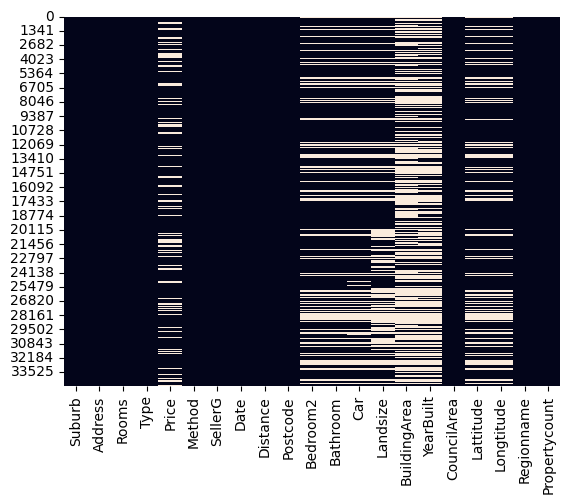

In [7]:
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)

## Handling Missing Values

### Dropping Missing Values
* Can use when the dataset is huge and the missing values are insignificant.
* **Drawback:** Loss of information
* How much loss is tolerable?

In [3]:
# Dropping missing values
df_dropped = df.dropna()

# Checkpoint after dropping missing values
checkpoint(df_dropped, 'checkpoint_dropped_missing_values')

Checkpoint 'checkpoint_dropped_missing_values' created.


### Imputing Missing Values

Imputation is the process of replacing missing data with substituted values. When considering imputation, the type of data and the pattern of missingness should guide the choice of the imputation method.



In [5]:
# import functions to visualize the imputed data from utils.py
from utils import plot_numerical_imputation, plot_categorical_imputation

# plot_numeric_imputation(original_df, imputed_df, column)
# plot_categorical_imputation(original_df, imputed_df, column)

### Mean Imputation
* **Use Case:** Suitable for numerical data without outliers.
* **Pros:** Preserves the sample mean.
* **Cons:** Reduces variance and may affect the distribution.

In [6]:
# Mean imputation for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_mean_imputed = df.copy()
df_mean_imputed[numeric_cols] = df_mean_imputed[numeric_cols].fillna(df_mean_imputed[numeric_cols].mean())

# Checkpoint after mean imputation
checkpoint(df_mean_imputed, 'checkpoint_mean_imputed')

Checkpoint 'checkpoint_mean_imputed' created.


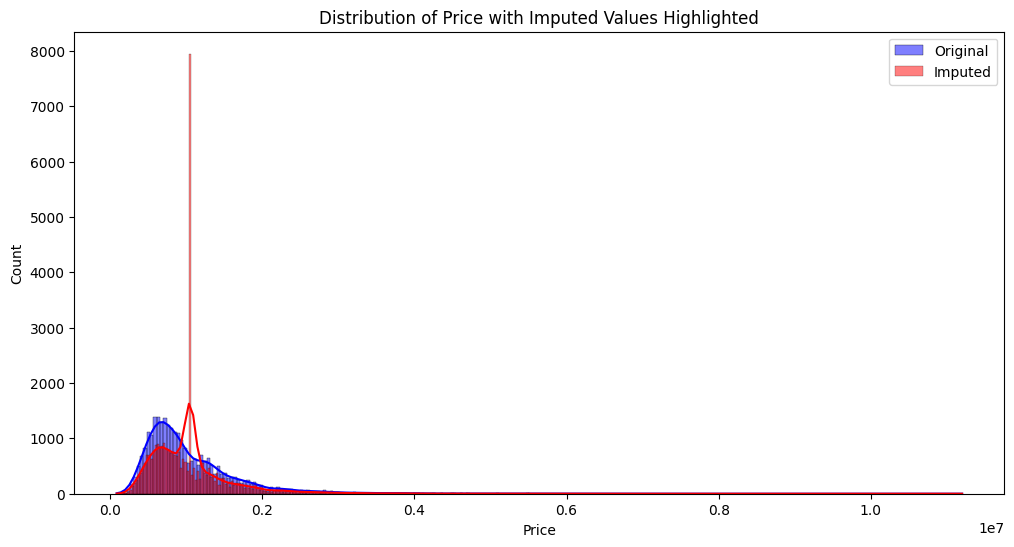

In [8]:
column = "Price"
plot_numerical_imputation(df, df_mean_imputed, column)

#### Mean Imputation Analysis

* **Spikes at Mean Value:** The red distribution shows a significant spike, which corresponds to the mean value where missing 'Price' values were imputed. This spike indicates that a non-negligible amount of data was missing and has been filled with the mean price.

* **Skewness and Distribution Shape:** The original data seems to be right-skewed, which is typical for price data, as there are usually a few very high values. The mean imputation does not seem to significantly alter the overall shape of the distribution except for the spike at the mean.

* **Potential Bias:** Imputing missing values with the mean can potentially introduce bias if the missing data is not missing at random. For example, if higher-priced houses are more likely to have missing data, the mean imputation will underestimate these prices, thus biasing the dataset.

* **Impact on Variance:** Imputing with the mean reduces the variance of the data, as all missing values are assigned the same value (the mean). The original variance of the price is higher compared to the variance after imputation, which is not visible directly from the histogram but can be inferred from the concentration of imputed values.

* **Considerations for Modeling:** When using this imputed dataset for predictive modeling, one must consider that the model might not learn to predict higher values accurately because the variability around the higher end of the price range has been artificially reduced.

### Median Imputation
* **Use Case:** Better for numerical data with outliers or non-normal distribution.
* **Pros:** More robust to outliers than mean.
* **Cons:** May not be representative if the data is not symmetric.

In [9]:
# Select only the numeric columns for median calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate median only for numeric columns
numeric_medians = df[numeric_cols].median()

# Apply median imputation only to numeric columns
df_median_imputed = df.fillna(numeric_medians)

# Checkpoint after median imputation
checkpoint(df_median_imputed, 'checkpoint_median_imputed')


Checkpoint 'checkpoint_median_imputed' created.


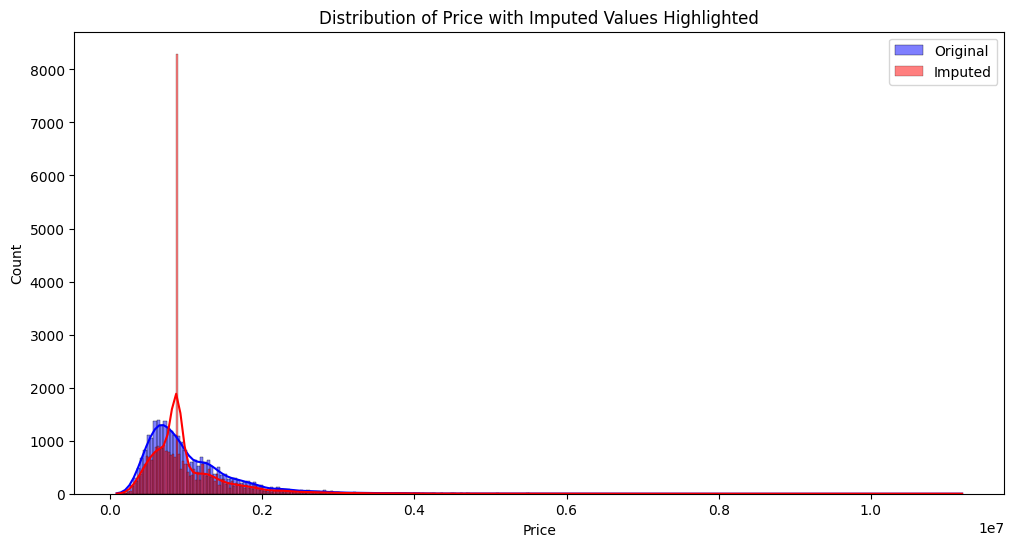

In [10]:
column = "Price"
plot_numerical_imputation(df, df_median_imputed, column)

### Mode Imputation

* **Use Case:** Suitable for categorical data.
* **Pros:** Preserves the sample mode.
* **Cons:** May introduce bias if the data is not missing at random.

Mode imputation can indeed be used for both numerical and categorical data. For numerical data, it's particularly useful when the data is not symmetrically distributed or when it's discrete numerical data (like counts or rankings). For categorical data, it's often the default choice since it's the only measure of central tendency that applies.


### Comparison

* **Mean vs. Median:** Mean is sensitive to outliers and may not be suitable for skewed data. Median is better for skewed distributions or when outliers are present.
* **Mean/Median vs. Mode:** Mode is generally used for categorical data. For numerical data, mean or median is preferred depending on the distribution.
* **Choosing the Best Method:** The choice depends on the data distribution and the nature of the variable. For normally distributed data without outliers, mean is suitable. For skewed data or data with outliers, median is more appropriate. For categorical data, mode is typically used.

### More Advanced Impuattaion Techniques

#### **Regression Imputation:** Use a predictive model to predict the missing values based on other variables. May lead to overfitting if the model is too complex.

/var/folders/07/tyj0f7lj0b77tpzp4qz3fhgm0000gn/T/ipykernel_70783/2281951097.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[target] = lr.predict(df_missing[[predictor]])
/Users/ardanyilmaz/Documents/DataScience/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


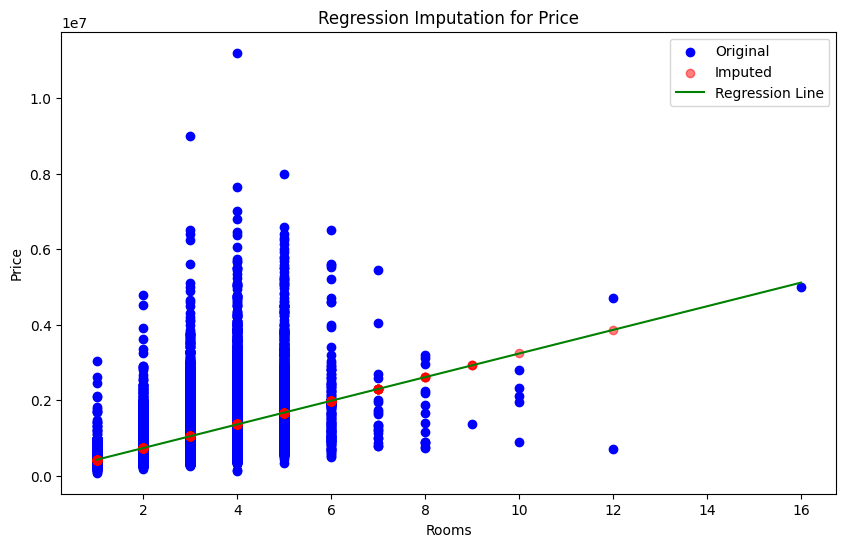

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming 'Price' is the column with missing values and 'Rooms' is the predictor
df_predictive = df.copy()
predictor = 'Rooms'
target = 'Price'

# Split data into non-missing and missing 'Price' datasets
df_non_missing = df_predictive[df_predictive[target].notnull()]
df_missing = df_predictive[df_predictive[target].isnull()]

# Train model on non-missing values
lr = LinearRegression()
lr.fit(df_non_missing[[predictor]], df_non_missing[target])

# Predict and fill missing values
df_missing[target] = lr.predict(df_missing[[predictor]])

# Combine back into a single DataFrame
df_imputed = pd.concat([df_non_missing, df_missing])

# Visualization
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(df_non_missing[predictor], df_non_missing[target], color='blue', label='Original')

# Overlay the imputed data points
plt.scatter(df_missing[predictor], df_missing[target], color='red', label='Imputed', alpha=0.5)

# Generate a range of values for the predictor
predictor_values = np.linspace(df_non_missing[predictor].min(), df_non_missing[predictor].max(), 100).reshape(-1, 1)

# Predict the target variable for our range of predictor values
predicted_line = lr.predict(predictor_values)

# Plot the regression line
plt.plot(predictor_values, predicted_line, color='green', label='Regression Line')

plt.xlabel(predictor)
plt.ylabel(target)
plt.title(f'Regression Imputation for {target}')
plt.legend()
plt.show()





####  k-Nearest Neighbors (k-NN) imputation
* KNN imputation considers the similarity between instances (rows) and uses this to predict the missing values.
* Distance Metric: A distance metric is chosen to measure the similarity between different instances. 
* Finding Neighbors: For a given instance with missing data, the algorithm identifies 'k' closest instances in the dataset that have a non-missing value for the attribute in question. 
* Estimating Missing Values: The missing value is estimated using the non-missing values from the identified neighbors. The estimation can be a simple mean or median of these values, or it can be a weighted average where nearer neighbors contribute more to the final estimate than the farther ones.

# Outlier Detection and Handling

Outliers are observations that are significantly different from other data points. Outliers can occur due to variability in the measurement or may indicate experimental errors. In either case, they can lead to serious problems in statistical analyses, including bias, invalid conclusions, and reduced power of statistical tests.


## Why Outlier Detection and Handling Is Needed?

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous downsides of outliers in the dataset:

1. Outliers can increase the error variance and reduce the power of statistical tests.
2. If the outliers are non-randomly distributed, they can decrease normality.
3. They can bias or influence estimates that may be of substantive interest.
4. They can also impact the basic assumption of  statistical model assumptions.

Therefore, it is essential to detect and handle outliers.

**We will opt for a syntetic dataset for this task.**


## Methods to Detect Outliers

There are various methods to detect outliers. We will focus on the following:

1. **Visual methods**: Boxplots and scatter plots to identify outliers.
2. **Statistical methods**: Z-Score and the Interquartile Range (IQR).

### Advanced Methods for Outlier Detection

In addition to the basic statistical methods for detecting outliers, there are more advanced techniques that can handle large datasets, high dimensionality, and can detect outliers in a multivariate context:

1. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This is a density-based clustering algorithm that identifies clusters and points that do not belong to any cluster. Outliers are identified as points that are not in a dense cluster.

2. **Isolation Forest**: An ensemble method that isolates anomalies instead of profiling normal data points. It works by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

3. **Local Outlier Factor (LOF)**: This method computes the local density deviation of a given data point with respect to its neighbors. It considers outliers as samples that have a substantially lower density than their neighbors.

4. **Elliptic Envelope**: Assumes the data is Gaussian and learns an ellipse that encapsulates the central data points. Points outside of the ellipse are considered outliers.

5. **One-Class SVM**: A variation of SVM that is used for anomaly detection. The algorithm learns a soft boundary in order to cluster the normal data, and any data point outside this boundary is considered an outlier.


### Visual Detection of Outliers Using Boxplots

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can reveal outliers by showing the data points that lie outside the whiskers.

Outliers are typically defined as being any data points that lie more than 1.5 IQRs (interquartile ranges) below the first quartile or above the third quartile. In a boxplot, these points are usually indicated with dots or asterisks.


#### Understanding Quartiles and the Interquartile Range (IQR)

In descriptive statistics, the data distribution is often divided into quartiles. These quartiles split the data into four equal parts after it has been sorted in ascending order. Here's what each quartile represents:

- **Q1 (First Quartile):** The first quartile, also known as the lower quartile, is the value that marks the 25th percentile of the dataset. It is the middle number between the smallest number in the dataset and the median. **This means that 25% of the data points in the dataset are less than or equal to Q1.**

- **Q2 (Second Quartile):** The second quartile is the **median of the dataset**. This is the middle value of the dataset, which effectively divides the dataset into two equal halves. Therefore, 50% of the data points are below the median.

- **Q3 (Third Quartile):** The third quartile, also known as the upper quartile, marks the 75th percentile of the data. It is the middle value between the median and the highest value of the dataset. At this point, 75% of the data is below Q3.

- **IQR (Interquartile Range):** The interquartile range is a measure of variability and is calculated by subtracting the first quartile (Q1) from the third quartile (Q3):
    - $\text{IQR} = Q3 - Q1$

    - The IQR represents the middle 50% of the data. It is used as a robust measure of scale that is not influenced by extremes or the shape of the distribution. It is particularly helpful in identifying outliers. In a box plot, for instance, any data point that is more than 1.5 times the IQR below Q1 or above Q3 is often considered an outlier. These are points that fall outside of the 'whiskers' in the box plot representation.
    - The IQR is not influenced by outliers or extreme values as much as standard deviation is because it only considers the middle bulk of the data.


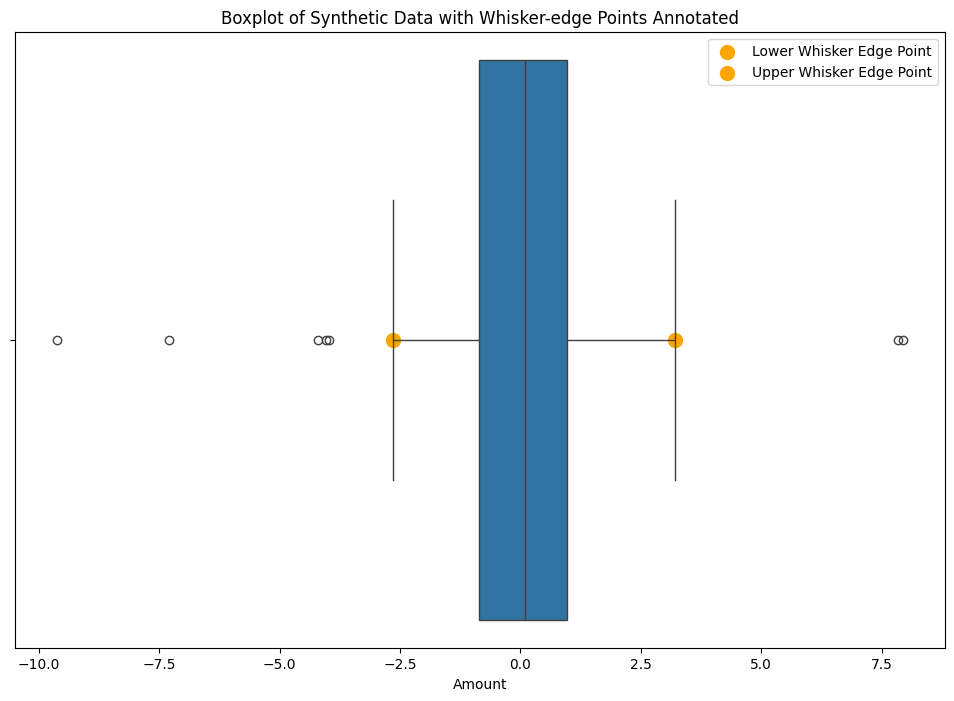

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Seed the random number generator for reproducibility
np.random.seed(0)

# Generate synthetic data
normal_data = np.random.randn(100)  # 100 normally distributed data points
outliers = np.random.uniform(low=-10, high=10, size=20)  # 20 outliers
data = np.concatenate((normal_data, outliers))  # Combine the normal data with outliers

# Convert to DataFrame for compatibility with Seaborn
df = pd.DataFrame(data, columns=['Amount'])

# Calculate the quartiles and IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Create a boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x=df['Amount'], whis=1.5)

# Identify the whisker-edge points within the dataset
whisker_edge_data = df[(df['Amount'] >= lower_whisker) & (df['Amount'] <= upper_whisker)]

# Find the points that are closest to the whiskers
lower_whisker_point = whisker_edge_data['Amount'].min()
upper_whisker_point = whisker_edge_data['Amount'].max()

# Annotate the whisker-edge points
plt.scatter([lower_whisker_point], [0], color='orange', s=100, label='Lower Whisker Edge Point')
plt.scatter([upper_whisker_point], [0], color='orange', s=100, label='Upper Whisker Edge Point')

# Adding legend to distinguish the annotated points
plt.legend()

plt.title('Boxplot of Synthetic Data with Whisker-edge Points Annotated')
plt.xlabel('Amount')
plt.show()




In [54]:
# Identify outliers as those outside of the whisker range
outliers_iqr = df[(df['Amount'] < lower_whisker) | (df['Amount'] > upper_whisker)]
outliers_iqr

,Amount
102,-9.616136
103,-3.968504
105,-4.198448
108,-7.290519
109,-4.034353
116,7.930932
119,7.838467


#### Boxplot Analysis

##### Boxplot Components

Here is a breakdown of the boxplot components:

- **Central Box**: The box in the middle represents the interquartile range (IQR), which contains the middle 50% of the data. The bottom of the box is the first quartile (Q1), and the top of the box is the third quartile (Q3).

- **Median Line**: The line in the middle of the box indicates the median of the data, which divides the dataset into two equal halves.

- **Whiskers**: The lines extending vertically from the box (called whiskers) indicate the range of the data. The bottom whisker extends to the lowest value within 1.5 * IQR below the first quartile, and the top whisker extends to the highest value within 1.5 * IQR above the third quartile.

- **Outliers**: Data points that appear as individual dots outside the whiskers are considered outliers. These are values that lie more than 1.5 * IQR above the third quartile or below the first quartile.

##### Outliers in the Boxplot

From the image, we can observe a significant number of outliers:

- **Lower Outliers**: There are many data points on the left side of the boxplot, scattered below the lower whisker, indicating a substantial amount of variability below the first quartile.

- **Upper Outliers**: Similarly, there are numerous data points above the upper whisker, showing variability above the third quartile.

##### Implications of Outliers

The presence of numerous outliers suggests that the data might be heavily skewed or that there are various reasons for the data points to deviate significantly from the rest of the distribution. This could be indicative of a non-normal distribution or that certain underlying factors are affecting the data, resulting in these anomalies.

### Detecting Outliers Using Z-Score

The Z-score is a statistical measure that tells us how many standard deviations away a data point is from the mean. A Z-score allows us to identify outliers by looking for data points that are too far from the zero.

Typically, a threshold of 3 or -3 is used; a data point with a Z-score greater than 3 or less than -3 is considered to be an outlier. This is because, under the standard normal distribution, almost all of the data (99.7%) should lie between -3 and 3 standard deviations from the mean.


In [55]:
import numpy as np
import pandas as pd
from scipy import stats

# Calculate the z-scores of the data points
# Z-score is a measure of how many standard deviations away a data point is from the mean
df['z_score'] = stats.zscore(df['Amount'])

# Define a threshold for identifying outliers
# A common threshold is to consider data points with a z-score beyond 3 or -3 as outliers
threshold = 3

# Identify the outliers
# They are the data points where the absolute value of the z-score is greater than the threshold
df['outlier'] = df['z_score'].abs() > threshold

# Print the outliers
outliers_zscore = df[df['outlier']]
print(outliers_zscore)

       Amount   z_score  outlier
102 -9.616136 -4.805867     True
108 -7.290519 -3.646497     True
116  7.930932  3.941723     True
119  7.838467  3.895628     True


### Comparison of IQR and Z-Score Outlier Detection Methods

When comparing the outcomes of the Interquartile Range (IQR) method and the Z-Score method for outlier detection, several points emerge:

- The IQR method detected 7 outliers whereas the Z-score method detected 4. This discrepancy can arise because the two methods measure different aspects of the data.

- The IQR method is based on the distribution of the median, which makes it robust against extreme values. Since it uses the middle 50% of the data, it's less affected by the skewness or distribution of the data.

- The Z-score method assumes that the data follows a Gaussian distribution and calculates the number of standard deviations from the mean. This means it can be sensitive to a dataset that has a heavy tail or is skewed, which might not be the case with this particular synthetic dataset.

- An important observation is that all outliers detected by the Z-score method are also detected by the IQR method. This indicates that these points are extreme outliers since they deviate significantly from the mean by more than 3 standard deviations.

- Some outliers detected by the IQR method are not detected by the Z-score. This can happen if the dataset has a 'heavy tail'—where there are extreme values that are still within the range of what's considered normal for that dataset—or if the mean and standard deviation are influenced by the outliers, which often happens in smaller or skewed datasets.

- The threshold for the Z-score method is typically set at 3 or -3, but this can be adjusted depending on the context and the understanding of the data. For IQR, the common multiplier for the IQR is 1.5 to define the whiskers, but again, this can be adjusted.

- The choice between using the IQR method and the Z-score method should be informed by the nature of the dataset and the specific circumstances of the analysis. For instance, if the data is not normally distributed, the IQR method might be preferred due to its robustness.

- Lastly, outlier detection is not an exact science and often requires additional context. For example, in real-world scenarios, what constitutes an outlier might be a valid extreme value that is of particular interest to the study.

In conclusion, both methods have their uses, and in practice, they can be used in tandem to ensure a thorough investigation of potential outliers in a dataset.


## Handling the Outliers

### Deletion
- **Description**: This method involves removing the outliers from the dataset.
- **Strengths**:
  - Simple to implement.
  - Effective if the outliers are due to errors in data collection or entry.
- **Weaknesses**:
  - Can lead to significant data loss, especially if outliers are frequent.
  - Not suitable if outliers are actual extreme values that contain important information.


In [56]:
# dataframe obtained by removing the outliers detected using IQR
df_no_iqr_outliers = df[(df['Amount'] >= lower_whisker) & (df['Amount'] <= upper_whisker)]

In [57]:
# dataframe obtained by removing the outliers detected using z score
df_no_zscore_outliers = df[df['outlier'] == False]

### Capping 
- **Description**: Outliers are replaced with the nearest value that is not an outlier.
- **Strengths**:
  - Retains the data size.
  - Reduces the influence of outliers without completely removing them.
- **Weaknesses**:
  - Can distort the true spread and variance of the data.
  - Arbitrarily choosing the threshold for capping can introduce bias.


In [58]:
# Winsorizing (capping) outliers using IQR
from scipy import stats
df_capped = df.copy()
df_capped['Amount'] = np.where(df_capped['Amount'] > upper_whisker, upper_whisker, 
                               np.where(df_capped['Amount'] < lower_whisker, lower_whisker, df_capped['Amount']))


### Imputation
- **Description**: Replacing outliers with a central tendency measure (mean, median, mode) or using a prediction model.
- **Strengths**:
  - Avoids the loss of data.
  - Can be a reasonable approach if the outliers are assumed to be incorrect.
- **Weaknesses**:
  - Can introduce bias if outliers are legitimate values.
  - Reduces the variance in the dataset, potentially impacting the results of subsequent analyses.


In [59]:
# MEDIAN imputation with IQR-detected outliers 
df_imputed = df.copy()
df_imputed.loc[df_imputed['Amount'] > upper_whisker, 'Amount'] = df_imputed['Amount'].median()
df_imputed.loc[df_imputed['Amount'] < lower_whisker, 'Amount'] = df_imputed['Amount'].median()


# Model Evaluation

## Train, Test, and Validation Sets

* **Train Set:** Used to train the model and adjust the weights on the training data.
* **Test Set:** Used to evaluate the performance of the model on new, unseen data. It gives an unbiased estimate of the model performance.
* **Validation Set:** Serves to provide an unbiased evaluation of a model fit during the training phase. It is also used for tuning the parameters of a model.

The validation set is often confused with the test set. The key difference is that the validation set is used during model training to adjust hyperparameters, while the test set is used to give an unbiased evaluation of the final model fit.

## Cross-Validation 
Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set). This process is then repeated multiple times.
Test set evaluation is when the model is trained on a training set and then evaluated on a test set that it has never seen before. This provides an unbiased final evaluation of the model's predictive power.

## Classification Metrics

* **Confusion Matrix:** This is a tabular representation of Actual vs Predicted values which helps to understand the performance of the classification model.
* **True Positives (TP):** These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
* **False Positives (FP):** When actual class is no and predicted class is yes.
* **True Negatives (TN):** When actual class is no and predicted class is also no.
* **False Negatives (FN):** When actual class is yes but predicted class is no.
* **Accuracy:** (TP+TN)/(TP+FP+FN+TN) is the accuracy which measures the proportion of true results among the total number of cases examined.
* **Precision:** (TP)/(TP+FP) is the precision which measures the proportion of true positive results.
* **Recall (Sensitivity):** (TP)/(TP+FN) is the recall which measures the proportion of actual positive cases which are correctly identified.
* **F1 Score:** 2*(Recall * Precision) / (Recall + Precision) is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account

## Sample ML Model: KNN

* KNN operates on a very simple principle: it classifies a data point based on how its neighbors are classified.
* 'k' in KNN represents the number of nearest neighbors to include in the majority vote for classifying the new data point.

### How KNN works:

* Choosing 'k': Decide on the number of neighbors to consider. This is typically a small, odd number to avoid ties, e.g., 3, 5, or 7.
* Distance Measure: Calculate the distance between the new point and all points in the training set. Common distance measures include Euclidean, Manhattan, or Minkowski distance.
* Find Nearest Neighbors: Identify the 'k' closest points in the training data to the new data point.
* Majority Vote: The new data point is assigned the class that the majority of the 'k' closest points belong to.


In the context of KNNs:

* **Train Set:** For a KNN classifier, the training set consists of labeled data points. KNN uses this set to 'memorize' the data, rather than performing explicit training as in other machine learning algorithms. When a prediction is made, KNN will look at the 'k' nearest neighbors from this training set to determine the output.
* **Validation Set:** This is used to tune the hyperparameters of the KNN model. In the case of KNN, the most critical hyperparameter is 'k', which represents the number of nearest neighbors to consider. The validation set helps in choosing the best 'k' that generalizes well to unseen data without overfitting.
* **Test Set:** After the model has been trained and validated, the test set is used to assess the performance of the KNN model. It provides an unbiased evaluation because the model has never seen this data during the training or hyperparameter tuning phases.


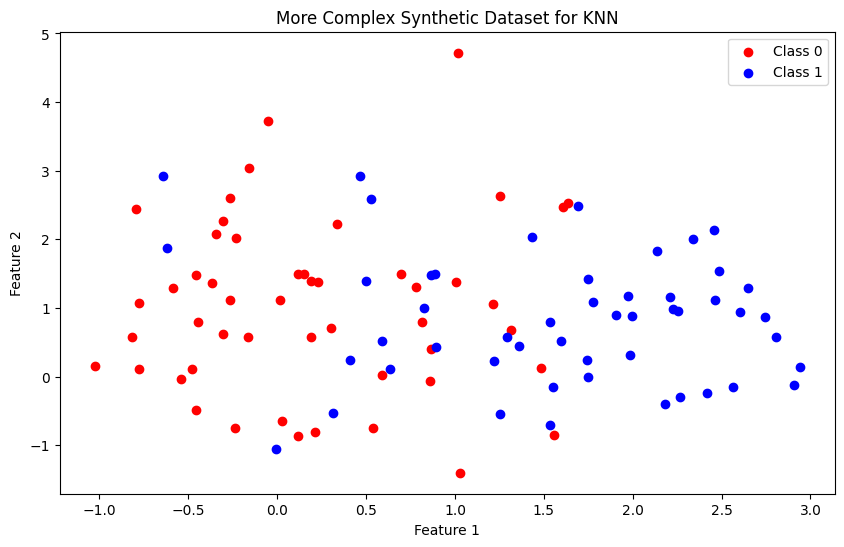

In [76]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

# Generate a more complex two-class dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2, class_sep=0.7)

# Introduce some noise to make it harder to separate
rng = np.random.RandomState(42)
X += 2 * rng.uniform(size=X.shape)

# Convert to a DataFrame for easier plotting
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Class'] = y

# Plotting the dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature_1'][df['Class'] == 0], df['Feature_2'][df['Class'] == 0], color='red', label='Class 0')
plt.scatter(df['Feature_1'][df['Class'] == 1], df['Feature_2'][df['Class'] == 1], color='blue', label='Class 1')
plt.title('More Complex Synthetic Dataset for KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()




In [77]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test, and validation set
X_train, X_test, y_train, y_test = train_test_split(df[['Feature_1', 'Feature_2']], df['Class'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)  


In [78]:
# get the lengths of the train, test, and validation sets
print(f"Train set: {len(X_train)}")
print(f"Test set: {len(X_test)}")
print(f"Validation set: {len(X_val)}")

Train set: 60
Test set: 20
Validation set: 20


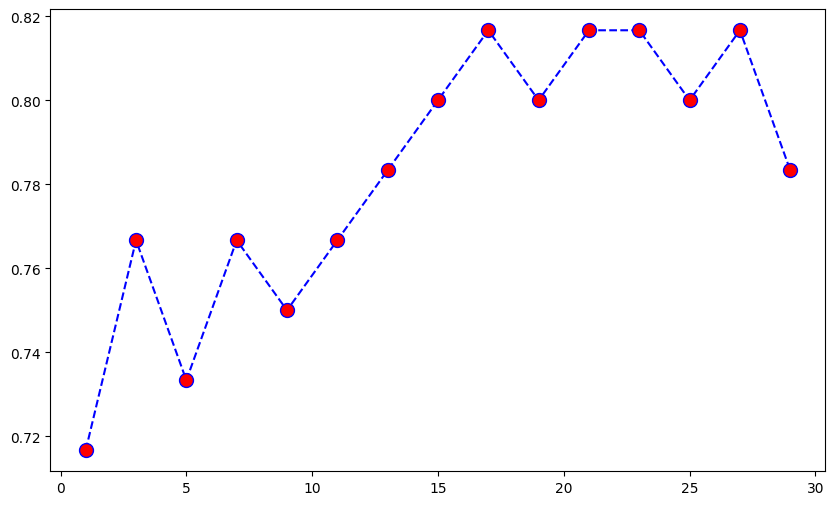

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# use cross-validation to find the best value of k
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 31, 2))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# plot the accuracy for each k
# the optimal value of k is the one that gives the highest accuracy

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)    

In [81]:
# optimal k is
optimal_k = k_values[cv_scores.index(max(cv_scores))]
optimal_k

21

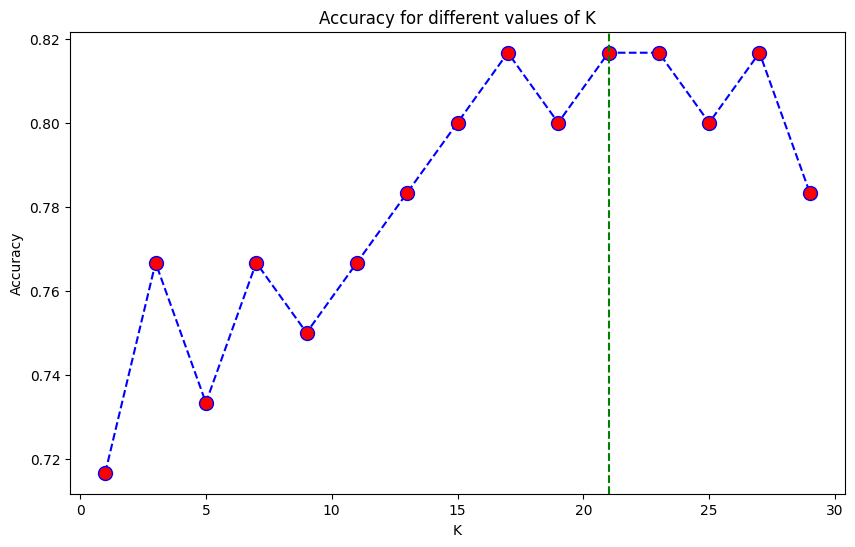

In [83]:
# print the accuracy obtained with different k values as a graph

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.axvline(x=optimal_k, color='green', linestyle='dashed')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of K')
plt.show()





# REFERENCES

[1] Kaggle. (n.d.). House Prices: Advanced Regression Techniques. Retrieved from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules



# ACKNOWLEDGEMENTS

• The design and development of this notebook have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualization and language refinement. 
